1.Dataset: https://www.kaggle.com/uciml/caravan-insurance-challenge/download

2.Tasks:

a. Preprocessing the Dataset/EDA          

b. Implementation of Feature extraction and Feature Selection   

c.Implementation of PCA/LDA in this Dataset

d Check once in during implementation of PCA, Consider n-compnents of PCA=1.What will you got? If you got some error . Please justify your answer.

e. Visulaization of Dataser by using seaborn, Matplotlib,Bokeh libray.

f. Choose an appropriate model for this dataset.

In [ ]:
import pandas as pd 
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plot
from sklearn.metrics import classification_report,confusion_matrix
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import RobustScaler
import os

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ajain09/Coursera/main/caravan-insurance-challenge.csv')
df.dropna()
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [ ]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,0.873142,2.286602,1.887294,3.237324,4.302891,1.484525,3.307269,4.592038,1.898799,0.403278,0.545714,2.877113,2.226532,2.291183,1.650682,1.595093,2.204744,3.742211,1.068214,4.187742,4.819487,6.022501,1.335980,1.956730,6.254327,2.750662,2.577072,3.505498,2.739462,0.808491,...,2.956424,0.054877,0.170841,0.008858,0.019344,0.093565,0.011505,0.215027,0.202301,0.011505,0.018733,0.023315,1.849420,0.001629,0.015272,0.025351,0.016697,0.045408,0.400020,0.014050,0.021279,0.557218,0.011098,0.040216,0.002240,0.011403,0.034413,0.005192,0.071065,0.079821,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,0.961955,1.710674,1.779238,1.609139,1.984152,1.645968,1.723377,2.279839,1.814406,0.786792,1.106349,1.846703,1.748025,1.684008,1.742410,1.321487,1.534163,1.944900,1.298229,3.093127,3.093541,1.543980,1.213627,1.596842,2.000374,2.002960,2.073125,1.871365,1.950625,1.173771,...,2.921736,0.566108,0.888518,0.237556,0.200885,0.604350,0.215408,0.810899,0.910574,0.188699,0.213712,0.375350,1.881271,0.057058,0.244210,0.157198,0.211487,0.396983,0.492001,0.126058,0.144319,0.608575,0.129928,0.223622,0.068402,0.116251,0.249706,0.109954,0.267432,0.384431,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1

In [ ]:
df['ORIGIN'].value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [ ]:
df['CARAVAN'].value_counts()  #imabalanced data

0    9236
1     586
Name: CARAVAN, dtype: int64

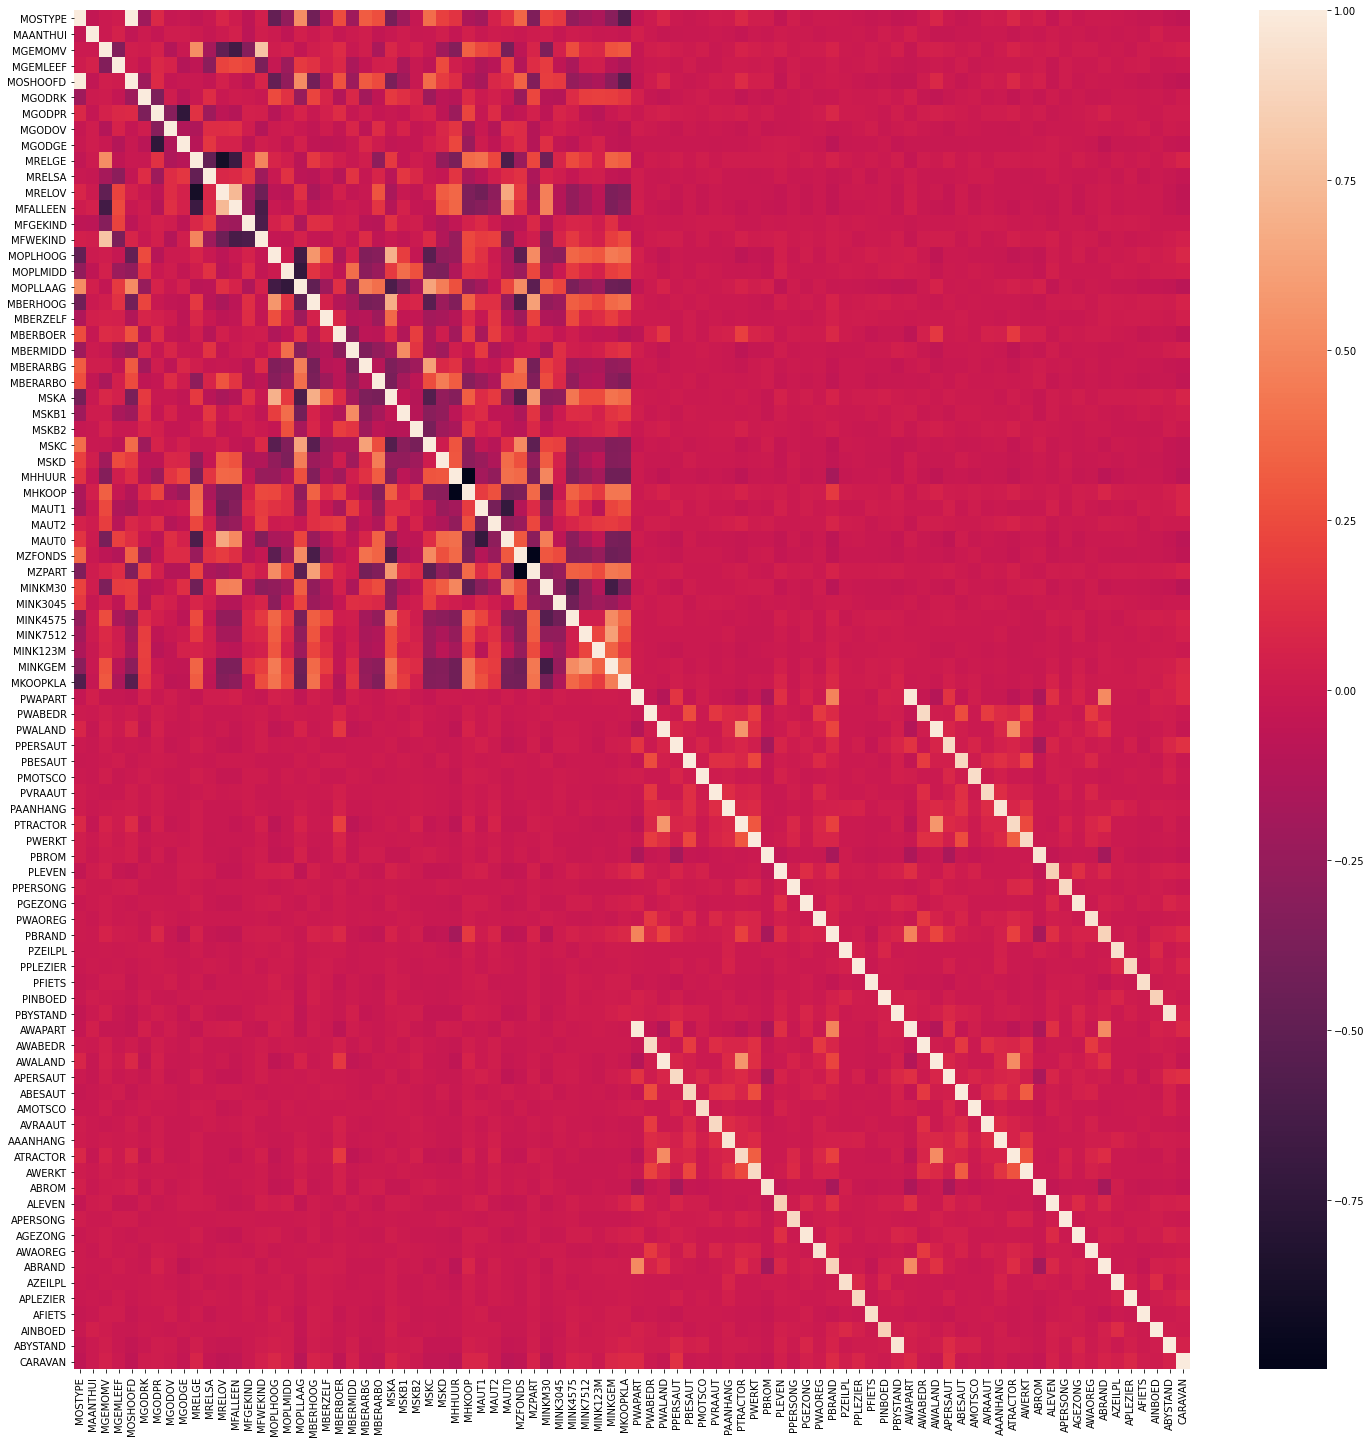

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.drop(columns=['ORIGIN']).corr());

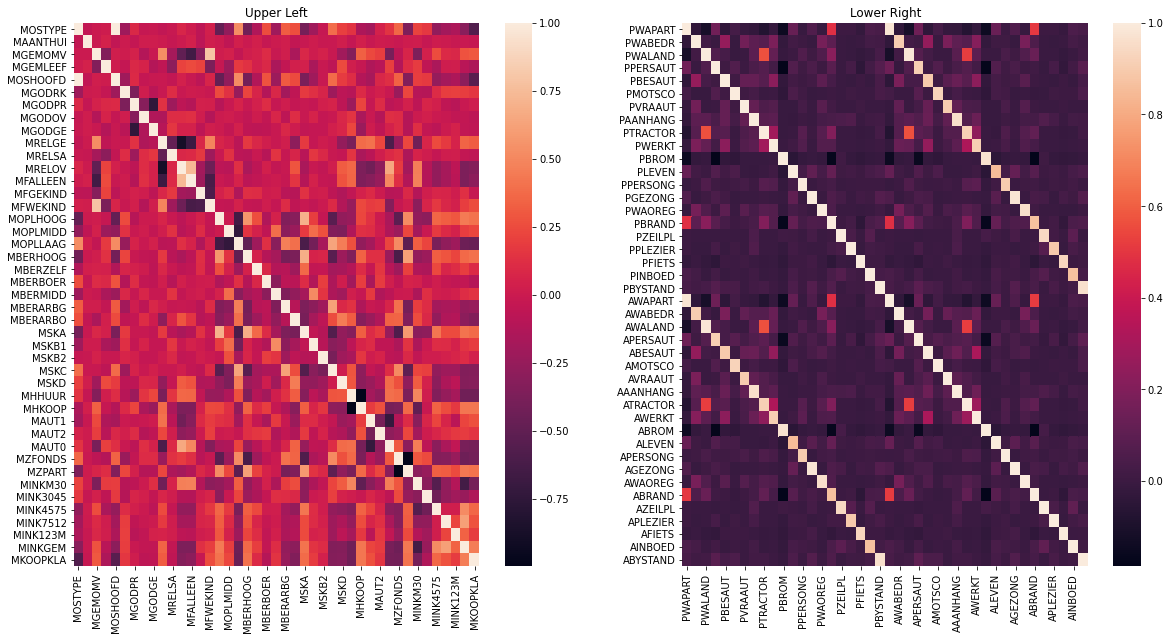

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=2)

sns.heatmap(df.drop(columns=['ORIGIN']).corr().iloc[:43, :43], ax=ax[0])
sns.heatmap(df.drop(columns=['ORIGIN']).corr().iloc[43:-1, 43:-1], ax=ax[1])

ax[0].set_title('Upper Left')
ax[1].set_title('Lower Right')

fig.show()

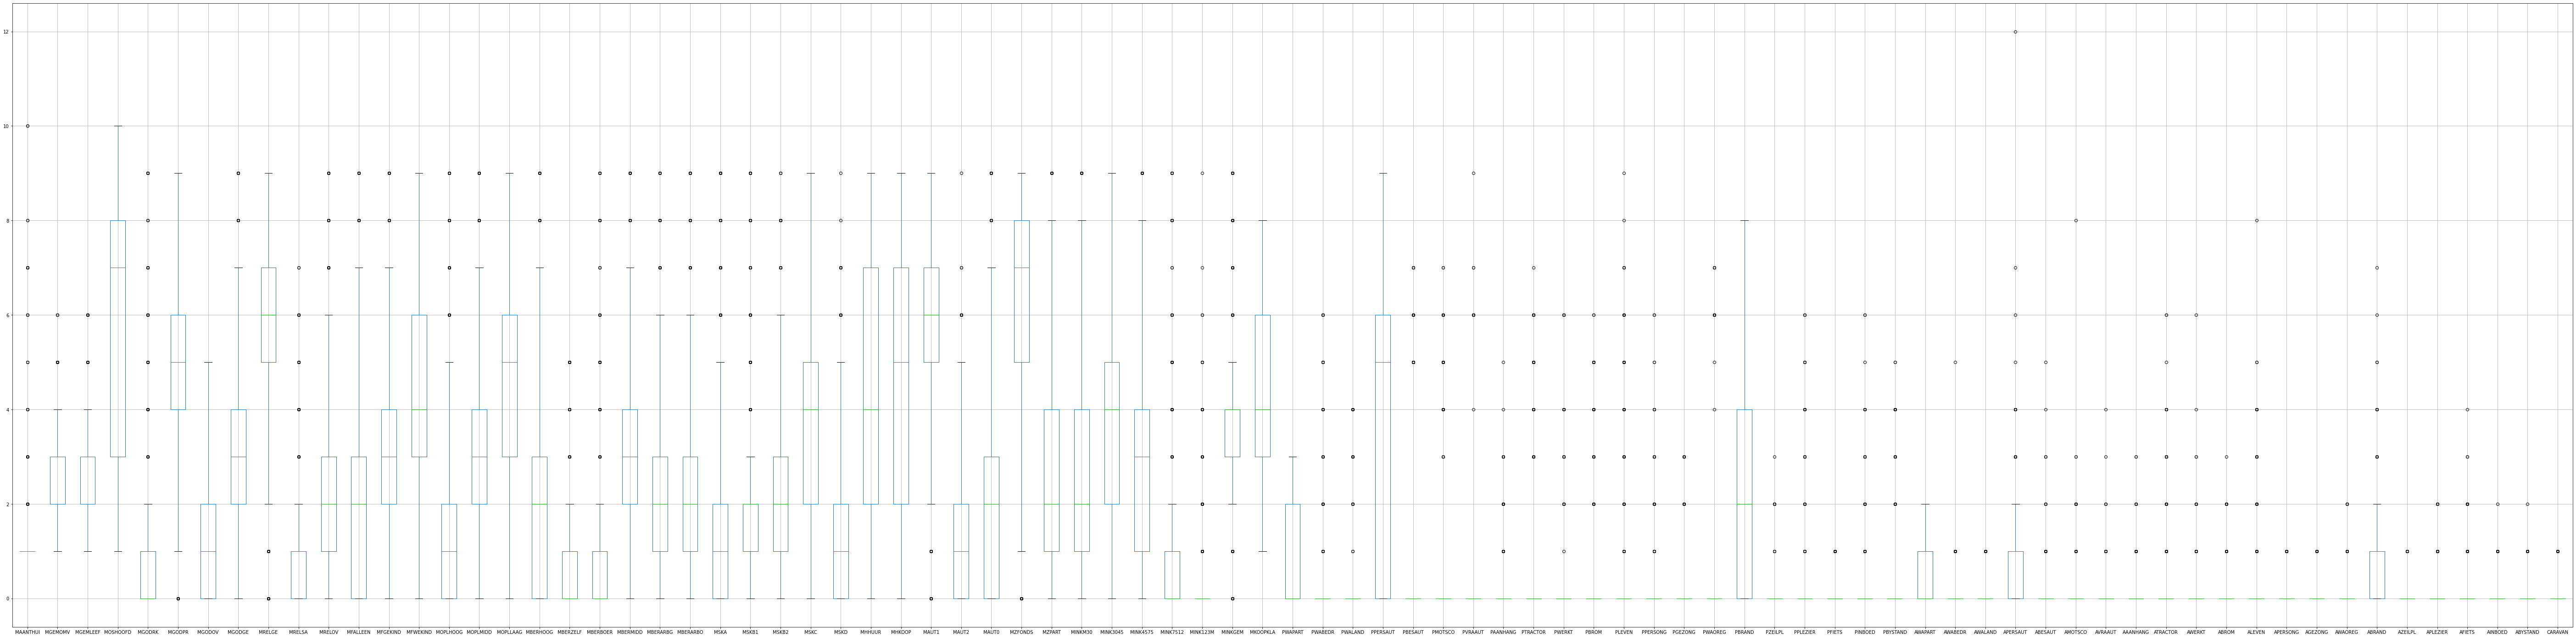

In [ ]:
cols = df.drop(['ORIGIN','MOSTYPE'], axis=1)
fig, ax = plt.subplots(figsize=(100,25))       
cols.boxplot(ax=ax)

Range and scale of values differ in every column.Outliers visible in the columns. Scaling required.




**TEST TRAIN**

In [ ]:
train = df[df.ORIGIN == 'train'].copy()
test = df[df.ORIGIN == 'test'].copy()

**SCALING**

Robust scaler for outliers

In [ ]:
y_train=train.CARAVAN
features=train.drop(columns=['CARAVAN','ORIGIN'])
s=RobustScaler()
scaled_train=s.fit_transform(features)
train_data=pd.DataFrame(scaled_train,columns=features.columns)

y_test=test.CARAVAN
features_test=test.drop(columns=['CARAVAN','ORIGIN'])
scaled_test=s.fit_transform(features_test)
test_data=pd.DataFrame(scaled_test,columns=features_test.columns)

**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
X_train = pca.fit_transform(train_data) 
print("X_train shape",X_train.shape)
X_test=pca.fit_transform(test_data)
print("X_test shape",X_test.shape)

X_train shape (5822, 37)
X_test shape (4000, 37)


In [ ]:
pca1 = PCA(n_components=1)
trial = pca1.fit_transform(train_data) 
trial.shape
#no error

(5822, 1)

**LDA**

In [ ]:
lda = LDA()
lda_trial=lda.fit_transform(X=train_data,y=y_train)
lda_trial.shape

(5822, 1)

**MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3757,    5],
       [ 237,    1]])

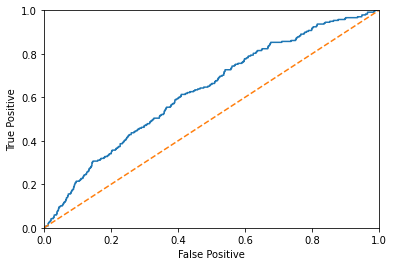

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()